In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

In [62]:
path="/Users/guoyalong/Downloads/injuries_2010-2020.csv"
path2="/Users/guoyalong/Downloads/Team_Records.csv"

In [63]:
#read in Team_records file
Team_records=pd.read_csv(path2)
Team_records.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [64]:
#read in injuries csv file
injuries_2010_2020=pd.read_csv(path)
injuries_2010_2020.head()

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


##Clean up injuries data

In [66]:
#drop the acquired column 
new_injuries_df=injuries_2010_2020.loc[:,["Date","Team","Relinquished","Notes"]]
new_injuries_df

,Date,Team,Relinquished,Notes
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...
27100,2020-09-30,Lakers,NaN,activated from IL
27101,2020-10-02,Heat,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,NaN,activated from IL


In [67]:
#get unique number of teams
new_injuries_df["Team"].nunique()

32

In [68]:
#get names of teams
teams=new_injuries_df["Team"].unique()
teams

array(['Bulls', 'Pistons', 'Blazers', 'Nets', 'Nuggets', 'Bucks', 'Kings',
       'Bobcats', 'Warriors', 'Suns', 'Heat', 'Thunder', 'Timberwolves',
       'Celtics', 'Lakers', 'Rockets', '76ers', 'Cavaliers', 'Clippers',
       'Grizzlies', 'Hawks', 'Hornets', 'Jazz', 'Knicks', 'Mavericks',
       'Pacers', 'Raptors', 'Spurs', 'Magic', 'Wizards', 'Pelicans', nan,
       'Bullets'], dtype=object)

In [69]:
#drop null values for relinquished
cleaned_injuries_df=new_injuries_df.dropna(subset=["Relinquished"])
cleaned_injuries_df

,Date,Team,Relinquished,Notes
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...
27097,2020-09-22,Celtics,Romeo Langford,surgery on right wrist (out for season)
27098,2020-09-23,Heat,Gabe Vincent,sore right knee (DTD)
27099,2020-09-30,Heat,Bam Adebayo,strained left shoulder (DTD)
27101,2020-10-02,Heat,Bam Adebayo,strained neck (DTD)


In [75]:
target_word = 'knee'
knee_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word)).sum()
knee_injuries_count

2714

In [78]:
target_word_2 = 'foot'
foot_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_2)).sum()
foot_injuries_count

756

In [79]:
target_word_3 = 'back'
back_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_3)).sum()
back_injuries_count

964

In [80]:
target_word_4 = 'shoulder'
shoulder_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_4)).sum()
shoulder_injuries_count

532

In [81]:
target_word_5 = 'wrist'
wrist_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_5)).sum()
wrist_injuries_count

261

In [82]:
target_word_6 = 'finger'
finger_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_6)).sum()
finger_injuries_count

133

In [83]:
target_word_7 = 'hip'
hip_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_7)).sum()
hip_injuries_count

425

In [85]:
target_word_8 = 'Achilles'
achilles_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_8)).sum()
achilles_injuries_count

263

In [86]:
target_word_9 = 'groin'
groin_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_9)).sum()
groin_injuries_count

372

In [87]:
target_word_10 = 'shin'
shin_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_10)).sum()
shin_injuries_count

46

In [88]:
target_word_11 = 'hand'
hand_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_11)).sum()
hand_injuries_count

203

In [89]:
target_word_12 = 'ankle'
ankle_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_12)).sum()
ankle_injuries_count

2185

In [90]:
target_word_13 = 'hamstring'
hamstring_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_13)).sum()
hamstring_injuries_count

649

In [91]:
target_word_14 = 'neck'
neck_injuries_count = cleaned_injuries_df['Notes'].apply(lambda x: x.split().count(target_word_14)).sum()
neck_injuries_count

102

In [15]:
#get unique number of players missing a game or placed on inactive list
players=new_injuries_df["Relinquished"].nunique()
players

1156

In [16]:
#groupby teams and players
clean_injuries_grouped = cleaned_injuries_df.groupby('Team')['Relinquished'].count().reset_index()

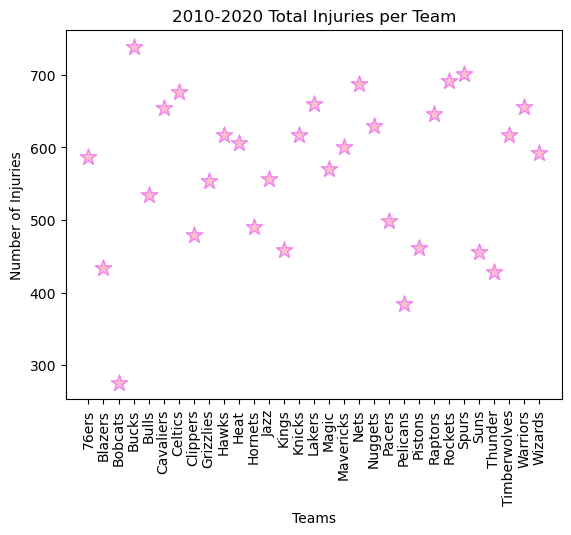

In [17]:
#2010-2020 Total Injuries
plt.scatter(clean_injuries_grouped['Team'], clean_injuries_grouped['Relinquished'],marker="*",color='violet',facecolor="pink",s=150)
plt.title("2010-2020 Total Injuries per Team")
plt.xlabel("Teams")
plt.ylabel("Number of Injuries")
plt.xticks(rotation=90)
plt.show()

In [18]:
cleaned_injuries_df['Date'] = pd.to_datetime(cleaned_injuries_df['Date'])
target_year=2015
fifteen=cleaned_injuries_df[cleaned_injuries_df['Date'].dt.year == target_year]
fifteen

/var/folders/rq/8wkmsgts1890_697cdk3rnd00000gn/T/ipykernel_10816/2909445291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_injuries_df['Date'] = pd.to_datetime(cleaned_injuries_df['Date'])


,Date,Team,Relinquished,Notes
11372,2015-01-01,Kings,Omri Casspi,placed on IL with left knee injury
11375,2015-01-02,Bucks,Larry Sanders,placed on IL
11380,2015-01-02,Jazz,Rodney Hood,left heel injury (out indefinitely)
11381,2015-01-02,Knicks,Carmelo Anthony,sore left knee (DTD)
11382,2015-01-02,Knicks,Tim Hardaway Jr.,placed on IL with concussion
...,...,...,...,...
14066,2015-12-31,Pacers,Ian Mahinmi,placed on IL with knee injury
14069,2015-12-31,Suns,Jon Leuer,ankle injury (DTD)
14070,2015-12-31,Thunder,Steve Novak,placed on IL
14072,2015-12-31,Timberwolves,Kevin Garnett,placed on IL for rest


In [19]:
fifteen.groupby('Team')['Relinquished'].count().reset_index()

,Team,Relinquished
0,76ers,54
1,Blazers,50
2,Bucks,47
3,Bulls,55
4,Cavaliers,48
5,Celtics,40
6,Clippers,41
7,Grizzlies,52
8,Hawks,85
9,Heat,65


In [20]:
target_year=2016
sixteen=cleaned_injuries_df[cleaned_injuries_df['Date'].dt.year == target_year]
sixteen

,Date,Team,Relinquished,Notes
14077,2016-01-01,76ers,Hollis Thompson,corneal abrasion in right eye (DTD)
14078,2016-01-01,Hornets,Al Jefferson,placed on IL recovering from surgery on right ...
14079,2016-01-01,Knicks,Cleanthony Early,placed on IL with knee injury (from gunshot wo...
14080,2016-01-01,Lakers,Kobe Bryant,placed on IL with sore right shoulder
14082,2016-01-01,Mavericks,Devin Harris,back spasms (DTD)
...,...,...,...,...
17038,2016-12-31,Knicks,Kristaps Porzingis,placed on IL with sore left Achilles
17039,2016-12-31,Knicks,Kyle O'Quinn,placed on IL with flu
17041,2016-12-31,Magic,Damjan Rudez,strained right calf (DTD)
17042,2016-12-31,Rockets,Patrick Beverley,sore right wrist (DTD)


In [21]:
sixteen.groupby('Team')['Relinquished'].count().reset_index()

,Team,Relinquished
0,76ers,71
1,Blazers,31
2,Bucks,53
3,Bulls,62
4,Cavaliers,60
5,Celtics,55
6,Clippers,59
7,Grizzlies,57
8,Hawks,36
9,Heat,62


In [22]:
target_year=2017
seventeen=cleaned_injuries_df[cleaned_injuries_df['Date'].dt.year == target_year]
seventeen

,Date,Team,Relinquished,Notes
17048,2017-01-01,Hawks,Taurean Prince,placed on IL
17049,2017-01-01,Heat,Hassan Whiteside,right eye injury (DTD)
17050,2017-01-01,Heat,Justise Winslow,torn labrum in right shoulder (out for season)
17051,2017-01-01,Jazz,George Hill,placed on IL
17052,2017-01-01,Kings,Ty Lawson,sinus fracture (DTD)
...,...,...,...,...
20391,2017-12-30,Spurs,Rudy Gay,placed on IL with bursitis in right heel
20393,2017-12-30,Warriors,Kevon Looney,placed on IL
20398,2017-12-31,Celtics,Jabari Bird,placed on IL
20400,2017-12-31,Grizzlies,Ivan Rabb,placed on IL


In [23]:
seventeen.groupby('Team')['Relinquished'].count().reset_index()

,Team,Relinquished
0,76ers,86
1,Blazers,55
2,Bucks,56
3,Bulls,69
4,Cavaliers,67
5,Celtics,77
6,Clippers,46
7,Grizzlies,77
8,Hawks,71
9,Heat,47


In [24]:
###Clean up Team_records Data

In [25]:
clean_team_records=Team_records.loc[:,["Season","Team","W","L","W/L%","Finish"]]
clean_team_records

,Season,Team,W,L,W/L%,Finish
0,2017-18,Boston Celtics,29,10,0.744,1
1,2016-17,Boston Celtics*,53,29,0.646,1
2,2015-16,Boston Celtics*,48,34,0.585,2
3,2014-15,Boston Celtics*,40,42,0.488,2
4,2013-14,Boston Celtics,25,57,0.305,4
...,...,...,...,...,...,...
1478,1999-00,Vancouver Grizzlies,22,60,0.268,7
1479,1998-99,Vancouver Grizzlies,8,42,0.160,7
1480,1997-98,Vancouver Grizzlies,19,63,0.232,6
1481,1996-97,Vancouver Grizzlies,14,68,0.171,7


In [26]:
#get unique number of teams
clean_team_records["Team"].nunique()

112

In [27]:
#get name of teams
clean_team_records["Team"].unique()

array(['Boston Celtics', 'Boston Celtics*', 'Toronto Raptors',
       'Toronto Raptors*', 'New York Knicks', 'New York Knicks*',
       'Philadelphia 76ers', 'Philadelphia 76ers*', 'Syracuse Nationals*',
       'Brooklyn Nets', 'Brooklyn Nets*', 'New Jersey Nets',
       'New Jersey Nets*', 'New York Nets', 'New York Nets*',
       'New Jersey Americans', 'Minnesota Timberwolves',
       'Minnesota Timberwolves*', 'Oklahoma City Thunder',
       'Oklahoma City Thunder*', 'Seattle SuperSonics',
       'Seattle SuperSonics*', 'Denver Nuggets', 'Denver Nuggets*',
       'Denver Rockets*', 'Portland Trail Blazers',
       'Portland Trail Blazers*', 'Utah Jazz', 'Utah Jazz*',
       'New Orleans Jazz', 'Cleveland Cavaliers', 'Cleveland Cavaliers*',
       'Detroit Pistons', 'Detroit Pistons*', 'Fort Wayne Pistons*',
       'Fort Wayne Pistons', 'Milwaukee Bucks', 'Milwaukee Bucks*',
       'Indiana Pacers', 'Indiana Pacers*', 'Chicago Bulls',
       'Chicago Bulls*', 'Golden State Warriors'

In [28]:
#Pick three random teams that have statistics for the same seasons

In [29]:
Nuggets=clean_team_records.loc[clean_team_records["Team"] =="Denver Nuggets",:]
Nuggets

,Season,Team,W,L,W/L%,Finish
367,2017-18,Denver Nuggets,19,16,0.543,3
368,2016-17,Denver Nuggets,40,42,0.488,4
369,2015-16,Denver Nuggets,33,49,0.402,4
370,2014-15,Denver Nuggets,30,52,0.366,4
371,2013-14,Denver Nuggets,36,46,0.439,4
382,2002-03,Denver Nuggets,17,65,0.207,7
383,2001-02,Denver Nuggets,27,55,0.329,6
384,2000-01,Denver Nuggets,40,42,0.488,6
385,1999-00,Denver Nuggets,35,47,0.427,5
386,1998-99,Denver Nuggets,14,36,0.280,6


In [30]:
Lakers=clean_team_records.loc[clean_team_records["Team"] =="Los Angeles Lakers",:]
Lakers

,Season,Team,W,L,W/L%,Finish
1021,2017-18,Los Angeles Lakers,11,23,0.324,5
1022,2016-17,Los Angeles Lakers,26,56,0.317,4
1023,2015-16,Los Angeles Lakers,17,65,0.207,5
1024,2014-15,Los Angeles Lakers,21,61,0.256,5
1025,2013-14,Los Angeles Lakers,27,55,0.329,5
1034,2004-05,Los Angeles Lakers,34,48,0.415,4
1045,1993-94,Los Angeles Lakers,33,49,0.402,5
1063,1975-76,Los Angeles Lakers,40,42,0.488,4
1064,1974-75,Los Angeles Lakers,30,52,0.366,5


In [31]:
Kings=clean_team_records.loc[clean_team_records["Team"] =="Sacramento Kings",:]
Kings

,Season,Team,W,L,W/L%,Finish
951,2017-18,Sacramento Kings,12,23,0.343,4
952,2016-17,Sacramento Kings,32,50,0.390,3
953,2015-16,Sacramento Kings,33,49,0.402,3
954,2014-15,Sacramento Kings,29,53,0.354,4
955,2013-14,Sacramento Kings,28,54,0.341,4
956,2012-13,Sacramento Kings,28,54,0.341,4
957,2011-12,Sacramento Kings,22,44,0.333,5
958,2010-11,Sacramento Kings,24,58,0.293,5
959,2009-10,Sacramento Kings,25,57,0.305,5
960,2008-09,Sacramento Kings,17,65,0.207,5


Text(0.5, 1.0, '2015 NBA Season Number of Injuries and Total Wins')

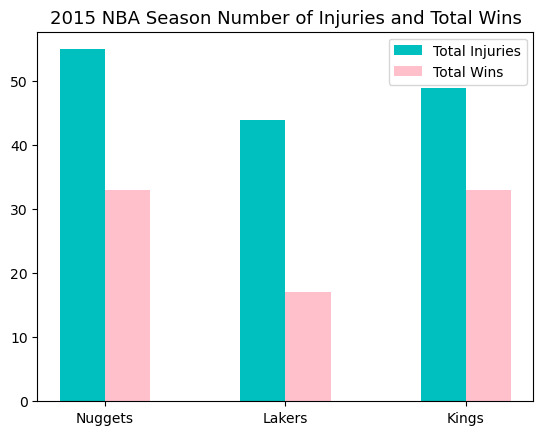

In [32]:
Names_2015 = ['Nuggets', 'Lakers', 'Kings']
Injuries_2015 = [55,44,49]
Wins_2015 = [33,17,33]

bar_width = 0.25
ind = np.arange(len(Names_2015))
fig, ax = plt.subplots()
bar1 = ax.bar(ind - bar_width/2, Injuries_2015, bar_width, label='Total Injuries', color='c')
bar2 = ax.bar(ind + bar_width/2, Wins_2015, bar_width, label='Total Wins', color='pink')
ax.legend()
ax.set_xticks(ind, Names_2015)
ax.set_title('2015 NBA Season Number of Injuries and Total Wins', fontsize=13, color='black')

Text(0.5, 1.0, '2016 NBA Season Number of Injuries and Total Wins')

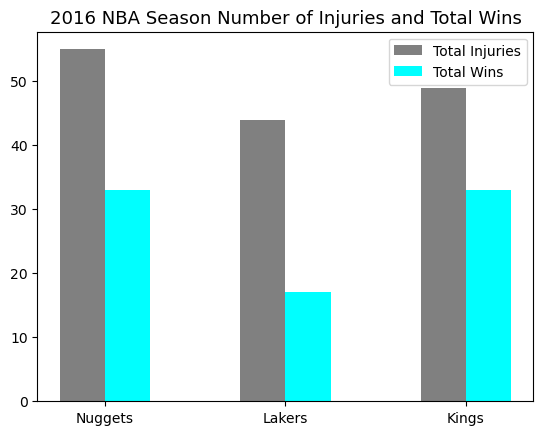

In [111]:
Names_2016 = ['Nuggets', 'Lakers', 'Kings']
Injuries_2016 = [52,81,65]
Wins_2016 = [40,26,32]

bar_width = 0.25
ind = np.arange(len(Names_2015))
fig, ax = plt.subplots()
bar1 = ax.bar(ind - bar_width/2, Injuries_2015, bar_width, label='Total Injuries', color='grey')
bar2 = ax.bar(ind + bar_width/2, Wins_2015, bar_width, label='Total Wins', color='cyan')
ax.legend()
ax.set_xticks(ind, Names_2015)
ax.set_title('2016 NBA Season Number of Injuries and Total Wins', fontsize=13, color='black')

Text(0.5, 1.0, '2017 NBA Season Number of Injuries and Total Wins')

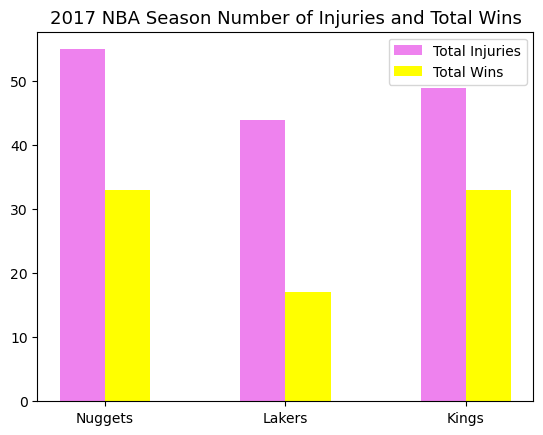

In [92]:
Names_2017 = ['Nuggets', 'Lakers', 'Kings']
Injuries_2017 = [90,65,73]
Wins_2017 = [19,11,12]

bar_width = 0.25
ind = np.arange(len(Names_2015))
fig, ax = plt.subplots()
bar1 = ax.bar(ind - bar_width/2, Injuries_2015, bar_width, label='Total Injuries', color='violet')
bar2 = ax.bar(ind + bar_width/2, Wins_2015, bar_width, label='Total Wins', color='yellow')
ax.legend()
ax.set_xticks(ind, Names_2015)
ax.set_title('2017 NBA Season Number of Injuries and Total Wins', fontsize=13, color='black')